In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("train.csv")

In [ ]:
dataset.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


At this point we see, that except the column that contains tweets themselves we also have the "keyword" column, which contains keyword from the tweet (the mechanism of choosing the keyword is unknown), and the "location" column, the place this tweet was sent from.
Both these additional columns contain null-objects.

In [ ]:
dataset["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
dataset["location"].value_counts()

USA                 104
New York             71
United States        50
London               45
Canada               29
                   ... 
Miami                 1
New York NYC          1
?s????ss? a?????      1
Ames, Iowa            1
???? ???????          1
Name: location, Length: 3341, dtype: int64

In [ ]:
dataset["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

So, the "keyword" and "location" columns contain string values. That means we will have to decide, how to encode them in such a way, that they can be processed with any ML or DL model. At this point I can see 2 ways:
* Encode columns as categorical values;
* Encode columns using the same encoding, used for the tweet.

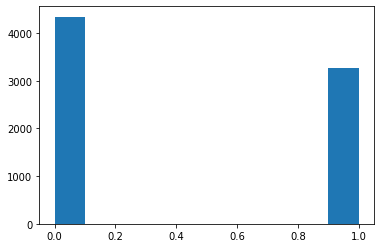

In [ ]:
fig, ax = plt.subplots()
ax.hist(dataset["target"])
fig.show()

Also as we see, the dataset contains a bit more tweets, that are considered to not announce a disaster, which in result can make our model a bit worse to detect positive values of target, that will represent disaster tweets.

In [ ]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
keyword_target_tab = pd.crosstab(dataset["keyword"], dataset["target"])
keyword_target_tab

target,0,1
keyword,,
ablaze,23,13
accident,11,24
aftershock,34,0
airplane%20accident,5,30
ambulance,18,20
annihilated,23,11
annihilation,19,10
apocalypse,23,9
armageddon,37,5


In [ ]:
len(keyword_target_tab)

221

As I can't see right away any words, that would be 100% markers for a disaster or not, I'm going to count a few things here:
If the number of tweets with some particular keyword don't signalize about disaster is at least 4 times bigger, than those which don't, we add this row to a non_disaster_keyword list.
The same thing works vice-versa.

In [ ]:
disaster_keyword = []
non_disaster_keyword = []

for i in range(0, len(keyword_target_tab)):
  if keyword_target_tab.iloc[i, 1] == 0 or keyword_target_tab.iloc[i, 0] / keyword_target_tab.iloc[i, 1] >= 4:
    non_disaster_keyword.append(keyword_target_tab.iloc[i])
  elif keyword_target_tab.iloc[i, 0] == 0 or keyword_target_tab.iloc[i, 1] / keyword_target_tab.iloc[i, 0] >= 4:
    disaster_keyword.append(keyword_target_tab.iloc[i])

In [ ]:
disaster_keyword[:3]

[target
 0     5
 1    30
 Name: airplane%20accident, dtype: int64, target
 0     2
 1    27
 Name: bombing, dtype: int64, target
 0     6
 1    29
 Name: bridge%20collapse, dtype: int64]

In [ ]:
non_disaster_keyword[:3]

[target
 0    34
 1     0
 Name: aftershock, dtype: int64, target
 0    37
 1     5
 Name: armageddon, dtype: int64, target
 0    29
 1     5
 Name: army, dtype: int64]

In [ ]:
len(disaster_keyword)

23

In [ ]:
len(non_disaster_keyword)

62

After these actions we see that there are 23 words, that give us at least 80% probability, that the tweet is about some disaster and 62 words with the same probability that it isn't.

In [ ]:
pd.crosstab(dataset["location"], dataset["target"])

target,0,1
location,,
,0,1
Glasgow,1,0
"Melbourne, Australia",1,0
News,0,1
å_,1,0
...,...,...
å_: ?? ÌÑ ? : ?,1,0
å_å_Los Mina Cityã¢,1,0
å¡å¡Midwest Û¢Û¢,1,0
